In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
shop_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

Initial inspection of data.

In [3]:
shop_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


a. Initially, my thought is that the calculation may be actually correct, but there may be outliers. The average is sensitive. It is not a very robust measure of location and is easily influenced by outliers. To test this, I will verify the calculation. AOV can be calculated by adding all the order amounts together, then dividing by the number of orders.

In [4]:
shop_data['order_amount'].sum() / len(shop_data)

3145.128

Given this result, which rounds to $3145.13, I am confident that this calculation is in fact correct. We can look at the distribution and summary of `order_amount` to see what could be happening.

In [5]:
shop_data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The summary statistics confirm that the calculation is in fact correct. The suspicions with the AOV is also immediately answered as well. The max value is $704,000 which is the reason for such a large AOV. 

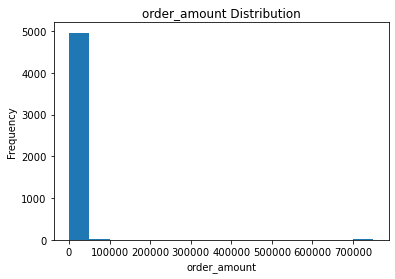

In [8]:
plt.hist(shop_data['order_amount'], bins = range(0, 800000, 50000))
plt.xlabel('order_amount')
plt.ylabel('Frequency')
plt.title('order_amount Distribution')
plt.show()

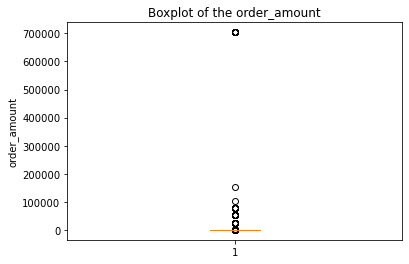

In [13]:
plt.boxplot(shop_data['order_amount'])
plt.xlabel('')
plt.ylabel('order_amount')
plt.title('Boxplot of the order_amount')
plt.show()

This hypothesis is further reinforced through the above histogram and boxplot. The majority of the orders is are between 0 to 50000 dollars, but there are several that are greater.

Other attributes can be chosen for a more robust measure of location. Several examples include:
* median
* trimmed mean


The median is robust since it relies on order statistics. Extreme values will not affect it as much. In fact, the breakdown point is 1/2, whereas for the mean it is 1/N, where N is the size of the population. From the above summary statistics, the median is determined to be 284 dollars.

In [12]:
np.median(shop_data['order_amount'])

284.0

The trimmed mean could also be used since it removes outliers to calculate the mean. It is not as robust as the median, especially if there are many outliers on only one tail of the distribution. If there are so many outliers on one tail that it is beyond the breakdown point, then a greater trim may be required. Below, a 5% trimmed mean is calculated.

In [15]:
stats.trim_mean(shop_data['order_amount'], 0.05)

294.3933333333333

b) The metric that I would report for this data set would be the median order value. It is similar to the average order value, just calculated using a different measure of center, which is far more robust and in this scenario, captures the central tendencies of the data far better than the average.

c) The median is 284 dollars.